## Two-Dimensional Level Packing


In some industries, raw material must be cut in several pieces of specified size. Here we consider the case where these pieces are rectangular [LMM02]. Also, due to machine operation constraints, pieces should be grouped horizontally such that firstly, horizontal layers are cut with the height of the largest item in the group and secondly, these horizontal layers are then cut according to items widths. Raw material is provided in rolls with large height. To minimize waste, a given batch of items must be cut using the minimum possible total height to minimize waste.

Formally, the following input data defines an instance of the Two Dimensional Level Packing Problem (TDLPP):

𝑊
raw material width

𝑛
number of items

𝐼
set of items = {0,…,𝑛−1}

𝑤𝑖
width of item 𝑖

ℎ𝑖
height of item 𝑖

The following image illustrate a sample instance of the two dimensional level packing problem.

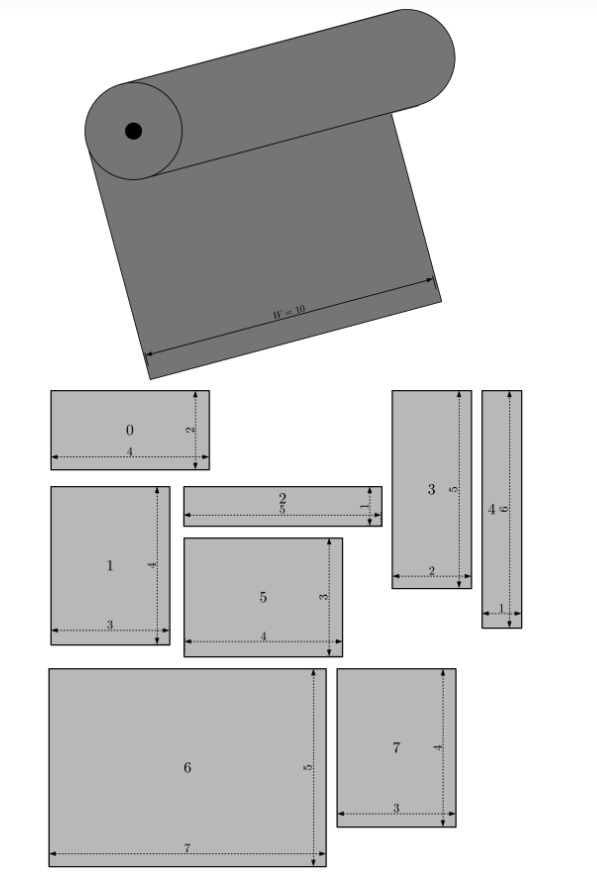

This problem can be formulated using binary variables 𝑥𝑖,𝑗∈{0,1}, that indicate if item 𝑗 should be grouped with item 𝑖 (𝑥𝑖,𝑗=1) or not (𝑥𝑖,𝑗=0). Inside the same group, all elements should be linked to the largest element of the group, the representative of the group. If element 𝑖 is the representative of the group, then 𝑥𝑖,𝑖=1.

Before presenting the complete formulation, we introduce two sets to simplify the notation. 𝑆𝑖 is the set of items with width equal or smaller to item 𝑖, i.e., items for which item 𝑖 can be the representative item. Conversely, 𝐺𝑖 is the set of items with width greater or equal to the width of 𝑖, i.e., items which can be the representative of item 𝑖 in a solution. More formally, 𝑆𝑖={𝑗∈𝐼:ℎ𝑗≤ℎ𝑖} and 𝐺𝑖={𝑗∈𝐼:ℎ𝑗≥ℎ𝑖}. Note that both sets include the item itself.

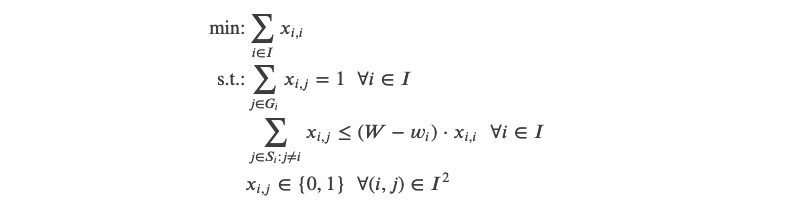

The first constraints enforce that each item needs to be packed as the largest item of the set or to be included in the set of another item with width at least as large. The second set of constraints indicates that if an item is chosen as representative of a set, then the total width of the items packed within this same set should not exceed the width of the roll.

The following Python-MIP code creates and optimizes a model to solve the two-dimensional level packing problem illustrated in the previous figure.

In [1]:
from mip import Model, BINARY, minimize, xsum

#    0  1  2  3  4  5  6  7
w = [4, 3, 5, 2, 1, 4, 7, 3]  # widths
h = [2, 4, 1, 5, 6, 3, 5, 4]  # heights
n = len(w)
I = set(range(n))
S = [[j for j in I if h[j] <= h[i]] for i in I]
G = [[j for j in I if h[j] >= h[i]] for i in I]

# raw material width
W = 10

m = Model()

x = [{j: m.add_var(var_type=BINARY) for j in S[i]} for i in I]

m.objective = minimize(xsum(h[i] * x[i][i] for i in I))

# each item should appear as larger item of the level
# or as an item which belongs to the level of another item
for i in I:
    m += xsum(x[j][i] for j in G[i]) == 1

# represented items should respect remaining width
for i in I:
    m += xsum(w[j] * x[i][j] for j in S[i] if j != i) <= (W - w[i]) * x[i][i]

m.optimize()

for i in [j for j in I if x[j][j].x >= 0.99]:
    print(
        "Items grouped with {} : {}".format(
            i, [j for j in S[i] if i != j and x[i][j].x >= 0.99]
        )
    )

Welcome to the CBC MILP Solver 
Version: devel 
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 8 (-8) rows, 31 (-7) columns and 61 (-15) elements
Clp1000I sum of infeasibilities 2.34542e-09 - average 2.93178e-10, 2 fixed columns
Coin0506I Presolve 8 (0) rows, 29 (-2) columns and 57 (-4) elements
Clp0029I End of values pass after 28 iterations
Clp0000I Optimal - objective value 11.822222
Clp0000I Optimal - objective value 11.822222
Coin0511I After Postsolve, objective 11.822222, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 11.822222
Clp0000I Optimal - objective value 11.822222
Clp0000I Optimal - objective value 11.822222
Coin0511I After Postsolve, objective 11.822222, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 11.82222222 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Items grouped with 0 : [2]
Items grouped with 